<a href="https://colab.research.google.com/github/sofiavasqq/Vasquez_Labs/blob/main/Vasquez_Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Intro to Linear Expressions 10/13/22

https://setosa.io/ev/ordinary-least-squares-regression/

In [64]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import urllib.request #the blueprint

In [65]:
url = "https://raw.githubusercontent.com/sofiavasqq/Vasquez_Labs/main/cereal_data.csv " #cereal data from github

In [66]:
urllib.request.urlretrieve(url,'cereal_data.csv') #this will download the data into colab

('cereal_data.csv', <http.client.HTTPMessage at 0x7f17a71b16a0>)

In [67]:
cereal_data = pd.read_csv('cereal_data.csv') #reads in the data using the panda

In [68]:
cereal_data #now we are able see and read the data in colab

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [69]:
cereal_data["sugars"] # by using square brackets and "" we are able to view indivual columns in the data

0      6
1      8
2      5
3      0
4      8
      ..
72     3
73    12
74     3
75     3
76     8
Name: sugars, Length: 77, dtype: int64

In [70]:
cereal_data[["calories", "sugars"]] #double bracket allows us to look at more than one column

,calories,sugars
0,70,6
1,120,8
2,70,5
3,50,0
4,110,8
...,...,...
72,110,3
73,110,12
74,100,3
75,100,3


In [71]:
cereal_data[["calories", "sugars", "protein"]] #using the brackets, we can pick which specific brackets we want displayed

,calories,sugars,protein
0,70,6,4
1,120,8,3
2,70,5,4
3,50,0,4
4,110,8,2
...,...,...,...
72,110,3,2
73,110,12,1
74,100,3,3
75,100,3,3


In [72]:
cereal_data["sugars"].mean() #.mean() allows us to take the mean of the column of data we are looking at

6.922077922077922

In [73]:
cereal_data[["calories", "sugars"]].mean() #colab could take the mean of multiple columns of data

calories    106.883117
sugars        6.922078
dtype: float64

In [74]:
cereal_data.describe() #.describe computes and displays summary statistics for a Python dataframe.

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


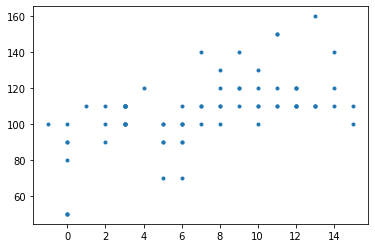

In [75]:
plt.plot(cereal_data[["sugars"]],cereal_data[["calories"]],'.') #using data to plot the sugars and calories of cereal on a dotted graph

Text(0.5, 1.0, 'Sugars vs Calories')

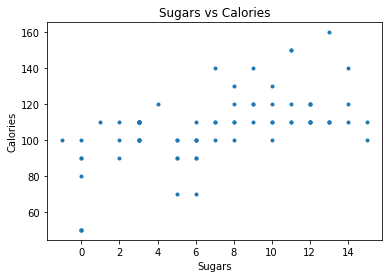

In [76]:
x = cereal_data[["sugars"]] #this is the same graph but the coding specifies that we want the x axis to be suars and the y axis to be calories
y = cereal_data[["calories"]]

plt.plot(x,y,'.') #'.' specifies that we want a dotted graph
plt.xlabel("Sugars") #creates a label for the x axis
plt.ylabel("Calories") #creates a label for the y axis
plt.title("Sugars vs Calories") #creates a general title for the entire graph

Text(0.5, 1.0, 'Fats vs Calories')

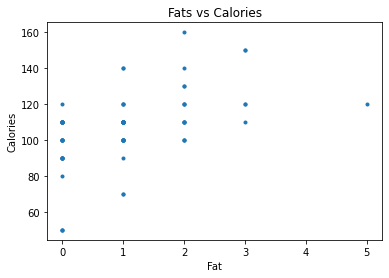

In [77]:
x = cereal_data[["fat"]] #this is the same graph but the coding specifies that we want the x axis to be suars and the y axis to be calories
y = cereal_data[["calories"]]

plt.plot(x,y,'.') #'.' specifies that we want a dotted graph
plt.xlabel("Fat") #creates a label for the x axis
plt.ylabel("Calories") #creates a label for the y axis
plt.title("Fats vs Calories") #creates a general title for the entire graph

Text(0.5, 1.0, 'Vitamins vs Fibers')

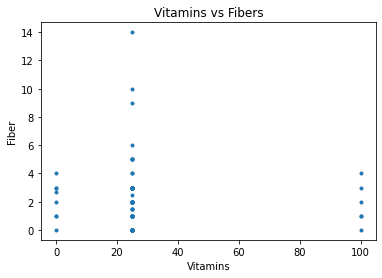

In [78]:
x = cereal_data[["vitamins"]] #this is the same graph but the coding specifies that we want the x axis to be suars and the y axis to be calories
y = cereal_data[["fiber"]]

plt.plot(x,y,'.') #'.' specifies that we want a dotted graph
plt.xlabel("Vitamins") #creates a label for the x axis
plt.ylabel("Fiber") #creates a label for the y axis
plt.title("Vitamins vs Fibers") #creates a general title for the entire graph

#Ways to make a Linear Fit/Line of Best Fit

In [79]:
X = cereal_data[["sugars"]] #makes the x value on the graph the sugars column from our data
Y = cereal_data[["calories"]] #makes the y value on the graph the calories column from our data

In [81]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()  #uses the relationship between the data-points to draw a straight line throught them all also know as line of best fit

In [82]:
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X) #predicts line of best fit

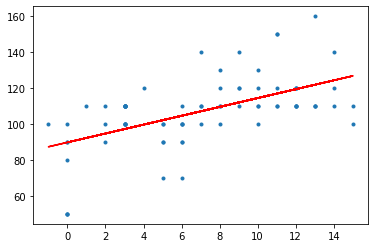

In [83]:
plt.plot(X, Y,'.') #tells the system to plot our x and y values as a dotted graph
plt.plot(X, Y_pred, color='red') #tells the system to make the line of best fit red
plt.show() #tells the system to display the graph just made

Ways to make a Linear Fit/Line of best Fit

In [84]:
x = np.linspace(0,10,50) #creates a numeric sequence from 0-10 

In [85]:
x #lists the array of random numbers from 0-10

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

In [86]:
m =3 #slope
b = 7 #y intercept

y = m * x + b #subs the variables given into the equation so that we can graph it

In [88]:
noise = 10 * np.random.randn(50,) #noise determines how wide the variation of our data is

In [89]:
y = m * x + b + noise #slope intercept

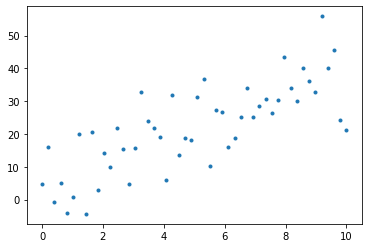

In [90]:
plt.plot(x,y,'.') #plots a dotted line graph using the equation above

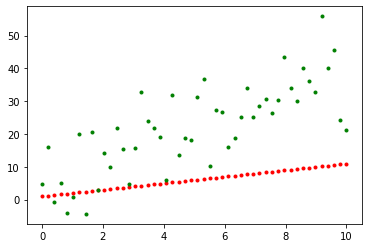

In [93]:
m_guess = 1 #guesses a random m or b for us to be 1
b_guess = 1 

y_guess = m_guess * x + b_guess

plt.plot(x,y_guess,'r.'); #r means the line of best fit is a red dotted line
plt.plot(x,y,'g.'); #g. meaning the dots are green doted line

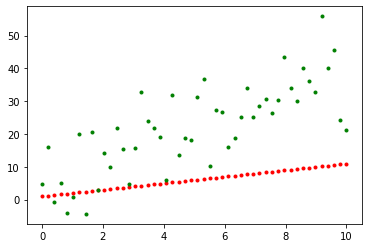

In [94]:
m_guess = 1 #guesses random slope intercept value to be 1
b_guess = 1 #guesses random slope intercept value to be 1 

y_guess = m_guess * x + b_guess

plt.plot(x,y_guess,'r.'); #r means the line of best fit is a red dotted line
plt.plot(x,y,'g.'); #g. meaning the dots are green doted line

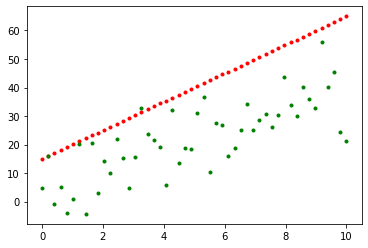

In [95]:
m_guess = 5 #makes the slope 5
b_guess = 15 #makes the yintercept 15

y_guess = m_guess * x + b_guess

plt.plot(x,y_guess,'r.');
plt.plot(x,y,'g.');

In [96]:
loss = np.sum((y_guess - y)**2) #loss tells us how much the predicited output of the model differs from the actual output

In [97]:
loss #shows us the loss from the data above

20819.838932017396

In [98]:
for m_guess in np.linspace(-10,10,10):
  print(m_guess) #guesses 10 numbers that ranges from -10 to 10

-10.0
-7.777777777777778
-5.555555555555555
-3.333333333333333
-1.1111111111111107
1.1111111111111107
3.333333333333334
5.555555555555557
7.777777777777779
10.0


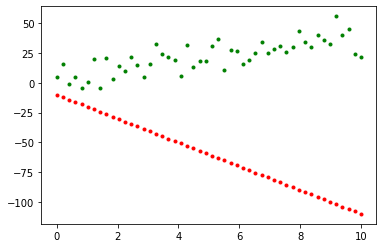

418358.627630075 -10.0 -10.0


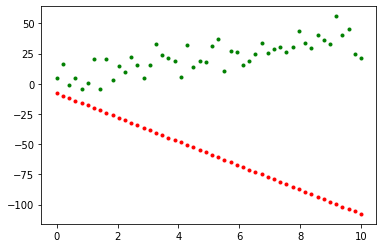

400377.5327291312 -10.0 -7.777777777777778


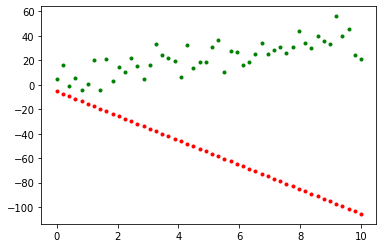

382890.2649886813 -10.0 -5.555555555555555


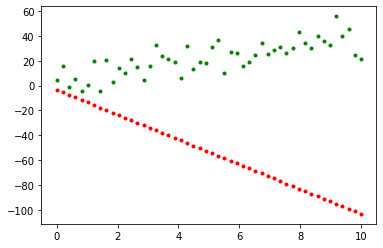

365896.8244087252 -10.0 -3.333333333333333


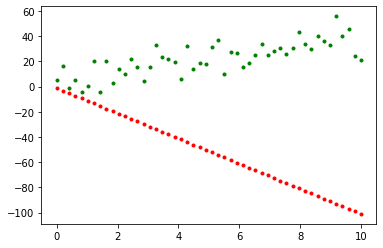

349397.21098926297 -10.0 -1.1111111111111107


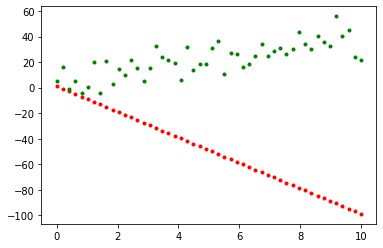

333391.4247302945 -10.0 1.1111111111111107


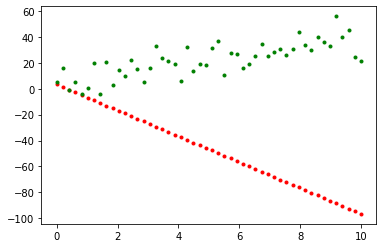

317879.4656318199 -10.0 3.333333333333334


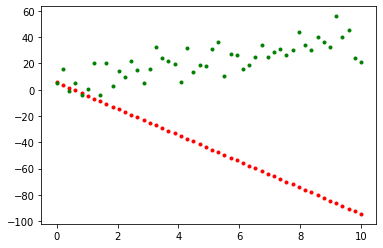

302861.3336938392 -10.0 5.555555555555557


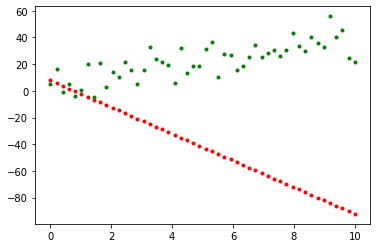

288337.02891635225 -10.0 7.777777777777779


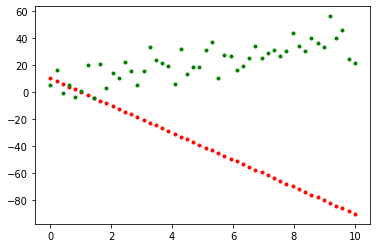

274306.55129935907 -10.0 10.0


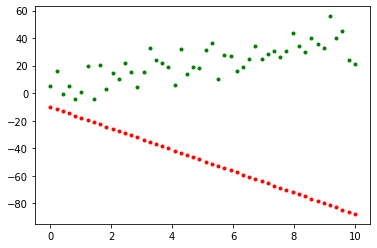

309628.5869015837 -7.777777777777778 -10.0


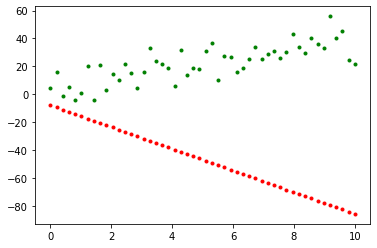

294116.62780310906 -7.777777777777778 -7.777777777777778


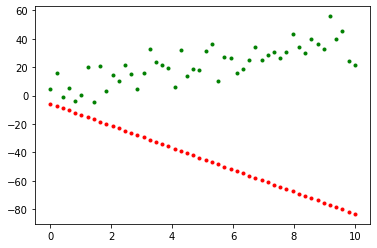

279098.4958651283 -7.777777777777778 -5.555555555555555


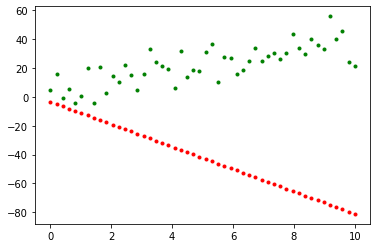

264574.1910876414 -7.777777777777778 -3.333333333333333


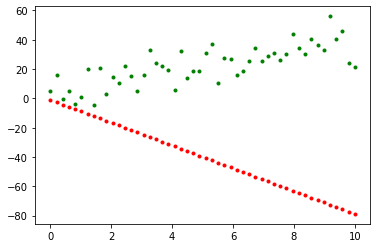

250543.71347064828 -7.777777777777778 -1.1111111111111107


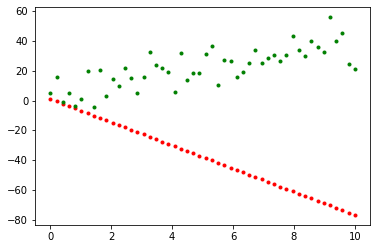

237007.06301414897 -7.777777777777778 1.1111111111111107


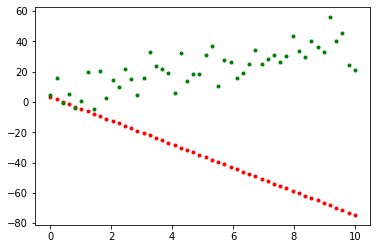

223964.2397181435 -7.777777777777778 3.333333333333334


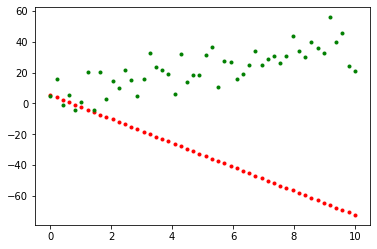

211415.24358263184 -7.777777777777778 5.555555555555557


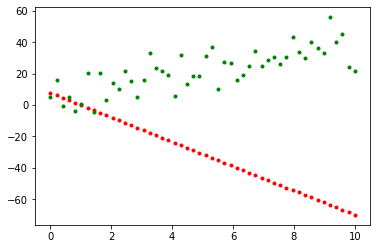

199360.07460761405 -7.777777777777778 7.777777777777779


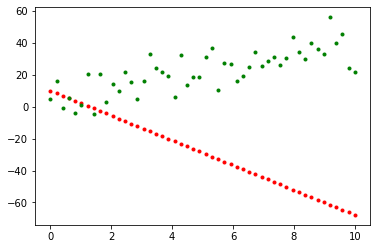

187798.73279309008 -7.777777777777778 10.0


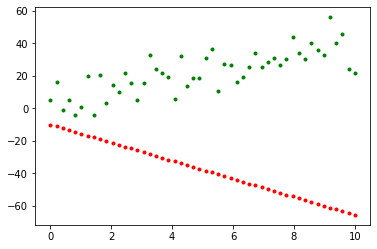

217527.41994482337 -5.555555555555555 -10.0


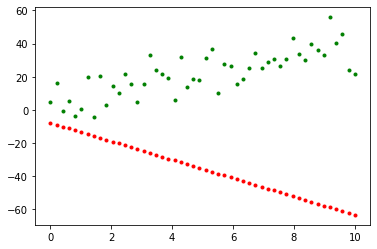

204484.59664881794 -5.555555555555555 -7.777777777777778


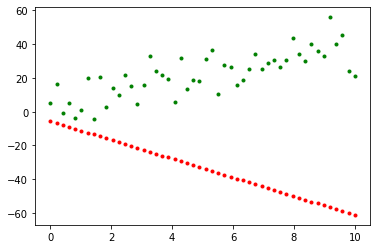

191935.6005133063 -5.555555555555555 -5.555555555555555


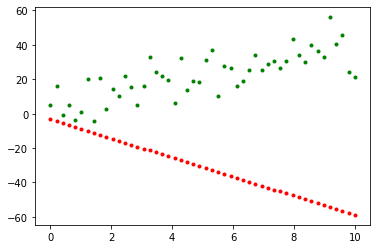

179880.43153828848 -5.555555555555555 -3.333333333333333


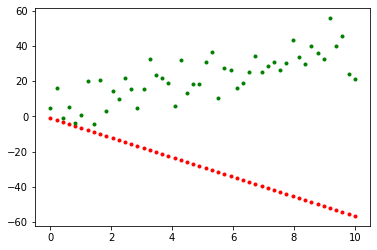

168319.08972376448 -5.555555555555555 -1.1111111111111107


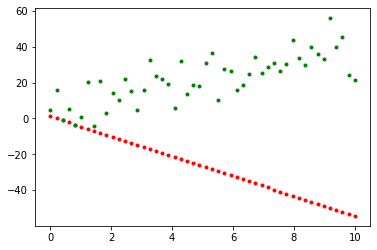

157251.57506973433 -5.555555555555555 1.1111111111111107


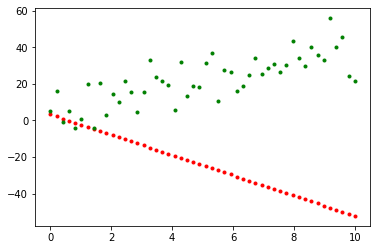

146677.887576198 -5.555555555555555 3.333333333333334


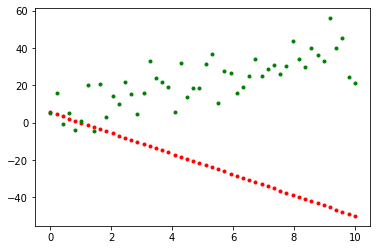

136598.02724315552 -5.555555555555555 5.555555555555557


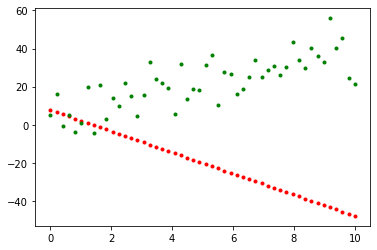

127011.99407060683 -5.555555555555555 7.777777777777779


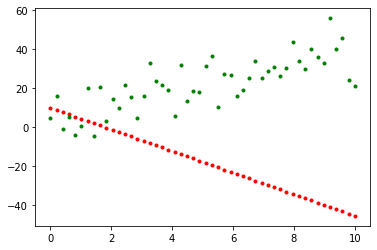

117919.78805855199 -5.555555555555555 10.0


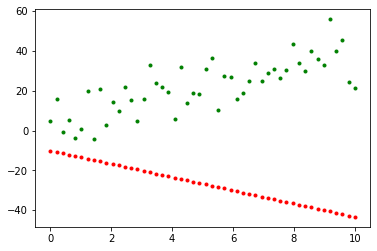

142055.12675979402 -3.333333333333333 -10.0


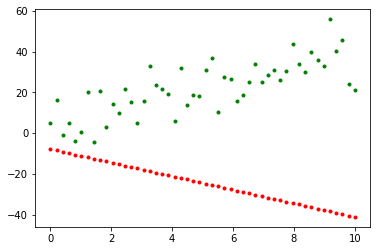

131481.43926625766 -3.333333333333333 -7.777777777777778


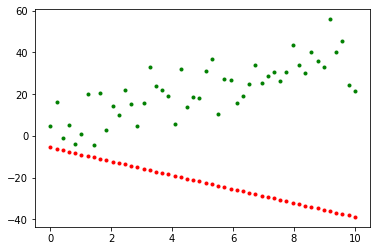

121401.57893321515 -3.333333333333333 -5.555555555555555


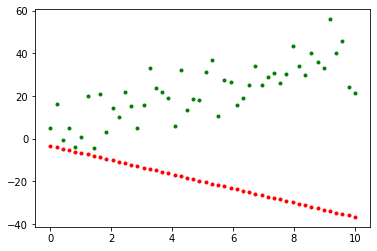

111815.54576066649 -3.333333333333333 -3.333333333333333


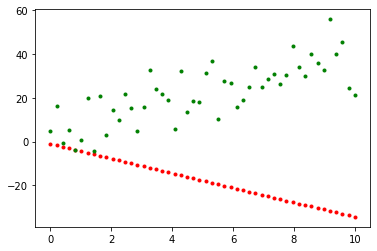

102723.33974861164 -3.333333333333333 -1.1111111111111107


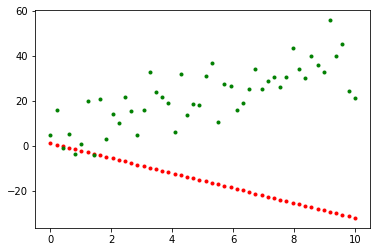

94124.96089705062 -3.333333333333333 1.1111111111111107


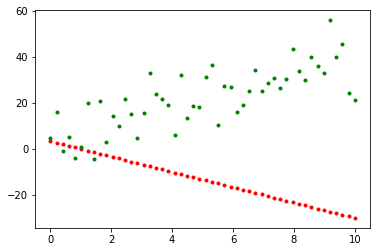

86020.40920598342 -3.333333333333333 3.333333333333334


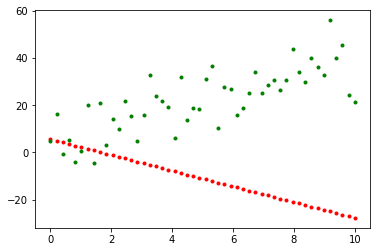

78409.68467541004 -3.333333333333333 5.555555555555557


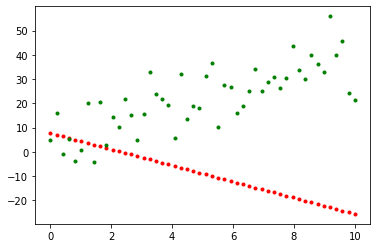

71292.78730533052 -3.333333333333333 7.777777777777779


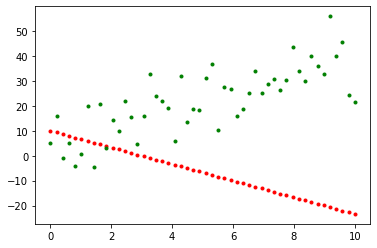

64669.7170957448 -3.333333333333333 10.0


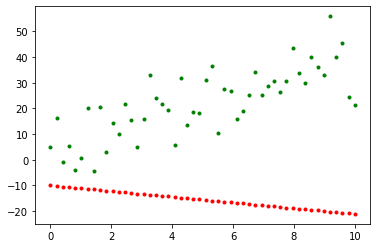

83211.70734649552 -1.1111111111111107 -10.0


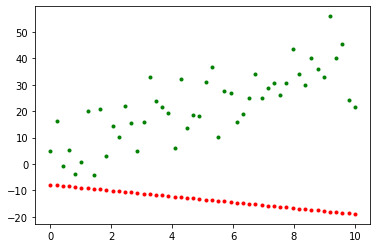

75107.15565542832 -1.1111111111111107 -7.777777777777778


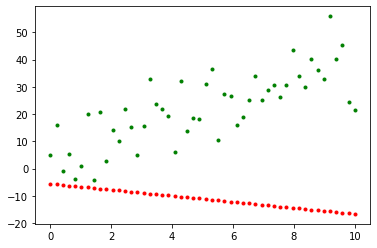

67496.43112485496 -1.1111111111111107 -5.555555555555555


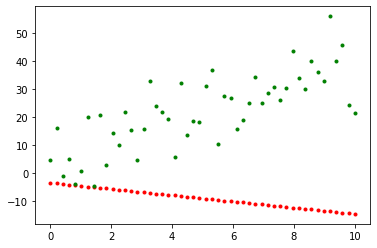

60379.5337547754 -1.1111111111111107 -3.333333333333333


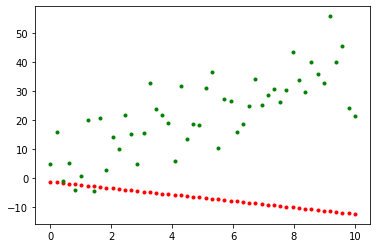

53756.463545189705 -1.1111111111111107 -1.1111111111111107


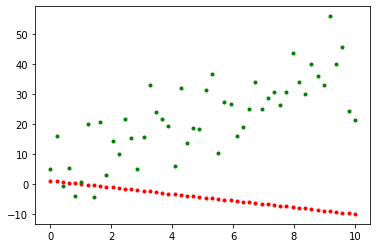

47627.220496097805 -1.1111111111111107 1.1111111111111107


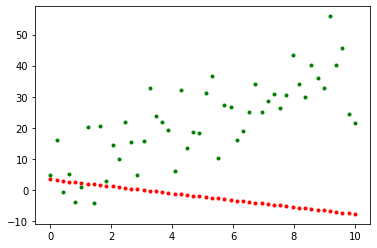

41991.80460749976 -1.1111111111111107 3.333333333333334


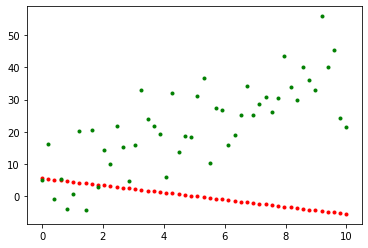

36850.215879395524 -1.1111111111111107 5.555555555555557


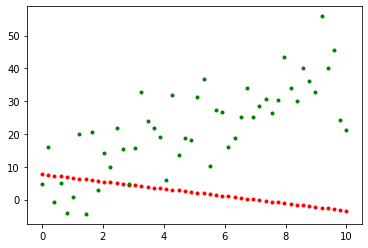

32202.45431178512 -1.1111111111111107 7.777777777777779


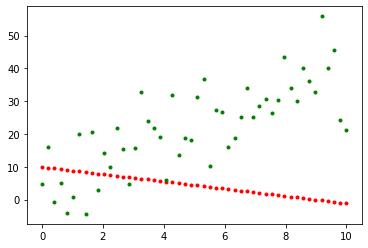

28048.519904668537 -1.1111111111111107 10.0


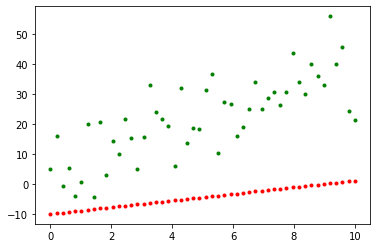

40997.16170492796 1.1111111111111107 -10.0


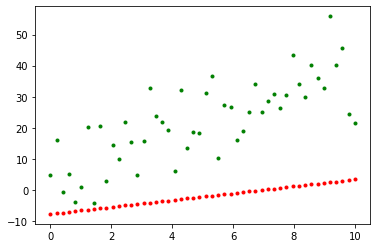

35361.7458163299 1.1111111111111107 -7.777777777777778


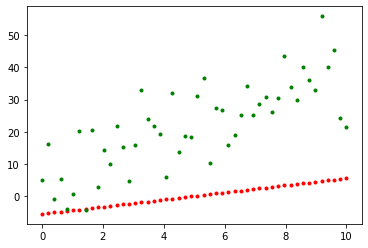

30220.157088225667 1.1111111111111107 -5.555555555555555


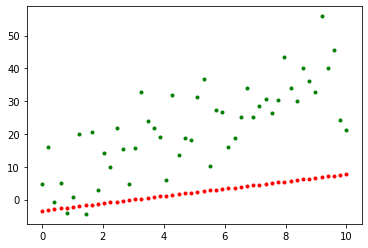

25572.39552061526 1.1111111111111107 -3.333333333333333


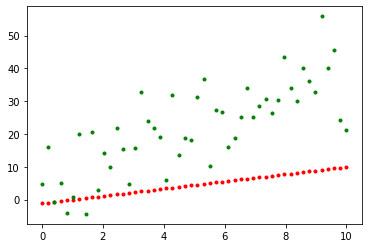

21418.461113498684 1.1111111111111107 -1.1111111111111107


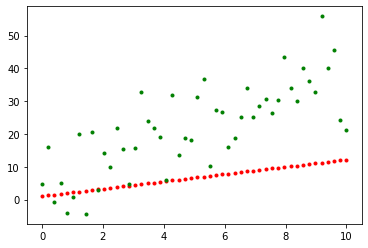

17758.35386687594 1.1111111111111107 1.1111111111111107


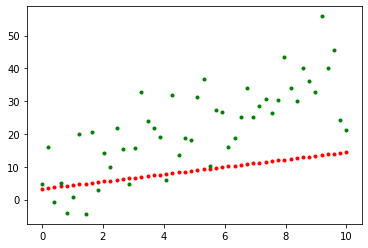

14592.073780747012 1.1111111111111107 3.333333333333334


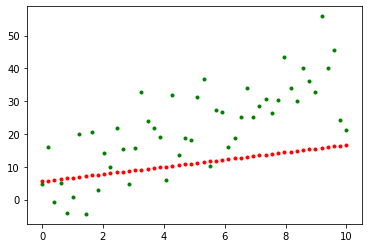

11919.620855111913 1.1111111111111107 5.555555555555557


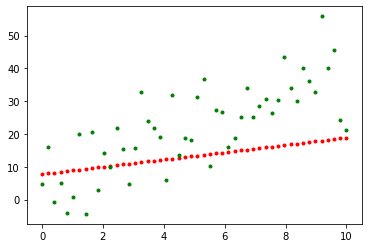

9740.995089970647 1.1111111111111107 7.777777777777779


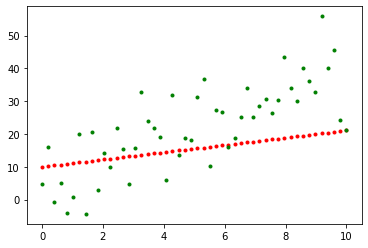

8056.196485323204 1.1111111111111107 10.0


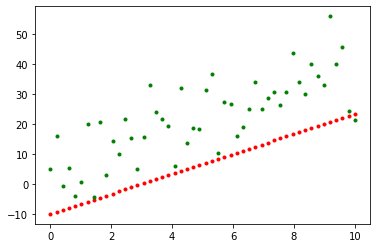

15411.489835091295 3.333333333333334 -10.0


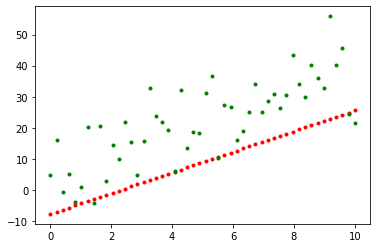

12245.209748962376 3.333333333333334 -7.777777777777778


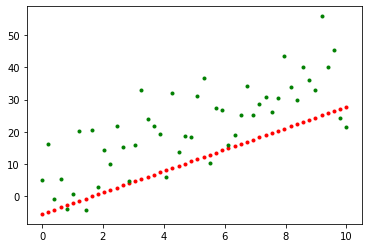

9572.756823327278 3.333333333333334 -5.555555555555555


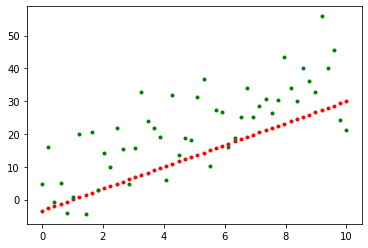

7394.13105818601 3.333333333333334 -3.333333333333333


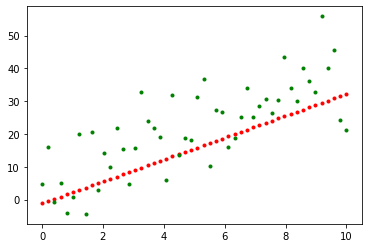

5709.332453538569 3.333333333333334 -1.1111111111111107


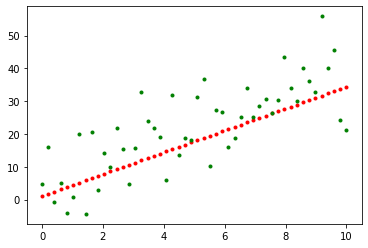

4518.361009384957 3.333333333333334 1.1111111111111107


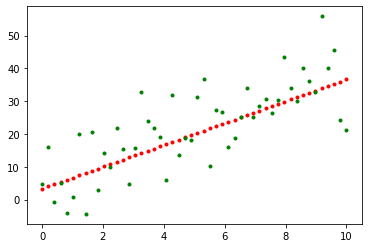

3821.216725725169 3.333333333333334 3.333333333333334


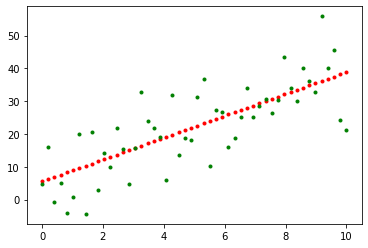

3617.8996025592096 3.333333333333334 5.555555555555557


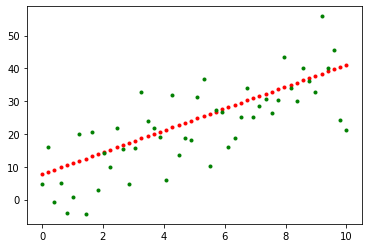

3908.409639887078 3.333333333333334 7.777777777777779


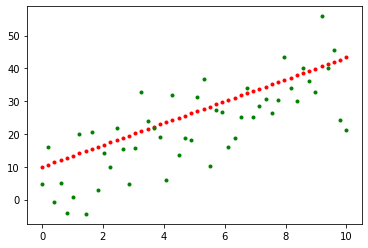

4692.746837708773 3.333333333333334 10.0


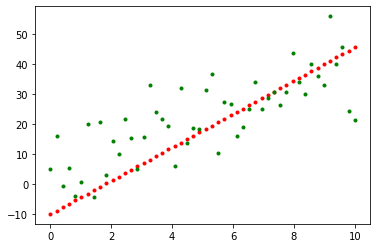

6454.691736985562 5.555555555555557 -10.0


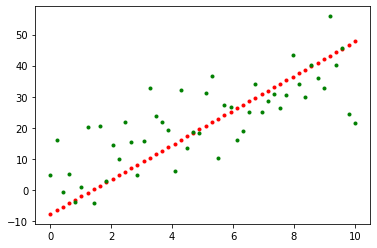

5757.547453325777 5.555555555555557 -7.777777777777778


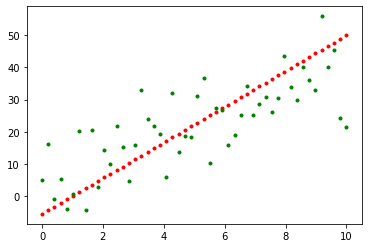

5554.230330159819 5.555555555555557 -5.555555555555555


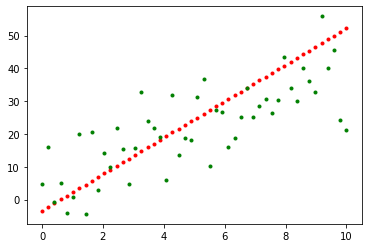

5844.740367487688 5.555555555555557 -3.333333333333333


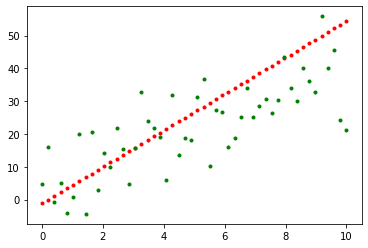

6629.077565309383 5.555555555555557 -1.1111111111111107


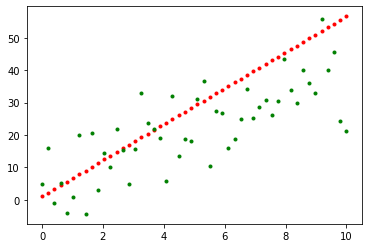

7907.241923624908 5.555555555555557 1.1111111111111107


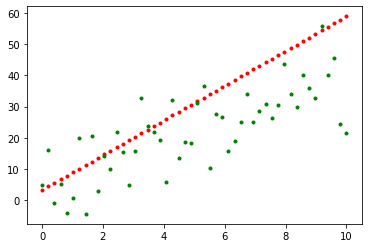

9679.233442434259 5.555555555555557 3.333333333333334


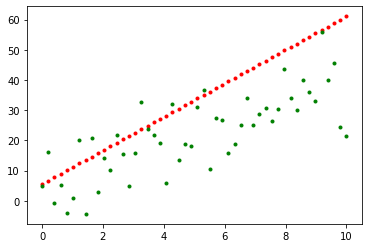

11945.052121737437 5.555555555555557 5.555555555555557


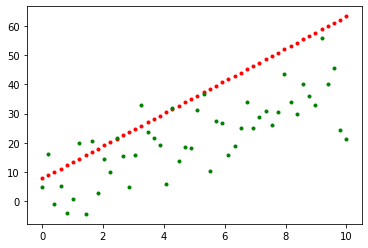

14704.69796153444 5.555555555555557 7.777777777777779


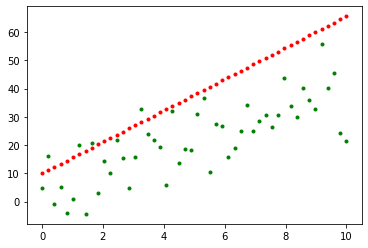

17958.17096182527 5.555555555555557 10.0


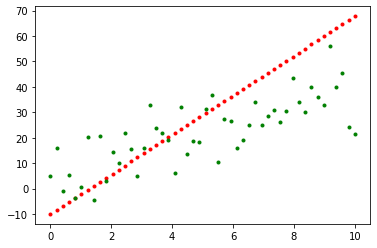

14126.767410610748 7.777777777777779 -10.0


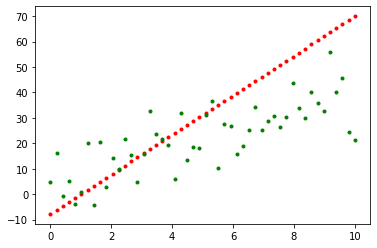

15898.758929420099 7.777777777777779 -7.777777777777778


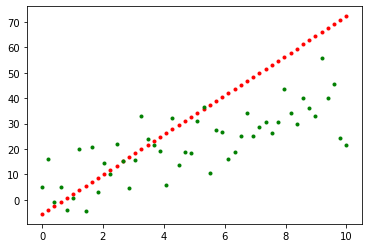

18164.57760872327 7.777777777777779 -5.555555555555555


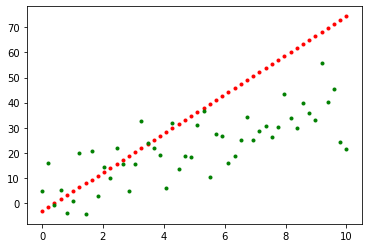

20924.22344852028 7.777777777777779 -3.333333333333333


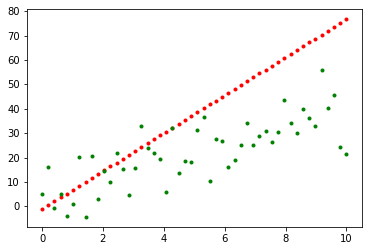

24177.696448811104 7.777777777777779 -1.1111111111111107


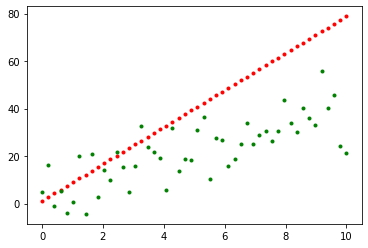

27924.996609595768 7.777777777777779 1.1111111111111107


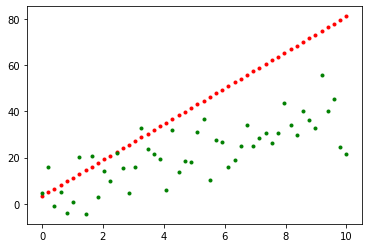

32166.123930874255 7.777777777777779 3.333333333333334


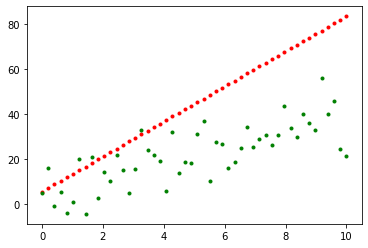

36901.07841264657 7.777777777777779 5.555555555555557


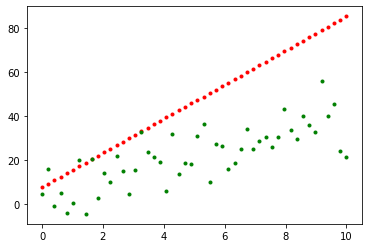

42129.86005491271 7.777777777777779 7.777777777777779


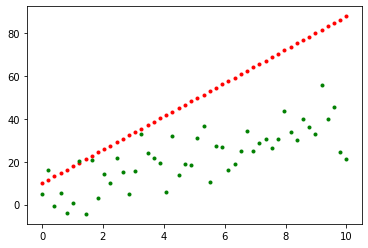

47852.46885767266 7.777777777777779 10.0


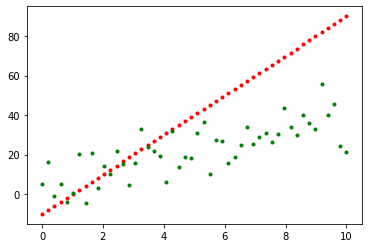

38427.716855966835 10.0 -10.0


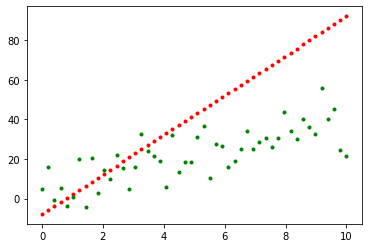

42668.84417724533 10.0 -7.777777777777778


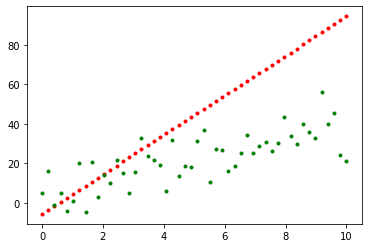

47403.79865901763 10.0 -5.555555555555555


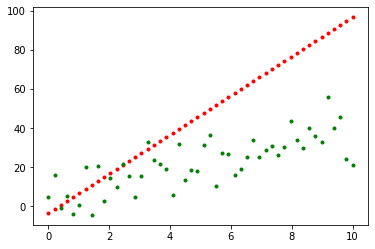

52632.58030128378 10.0 -3.333333333333333


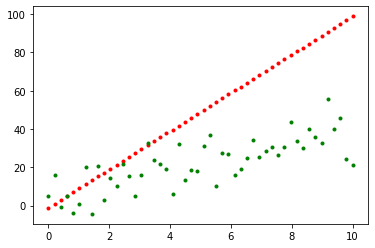

58355.18910404373 10.0 -1.1111111111111107


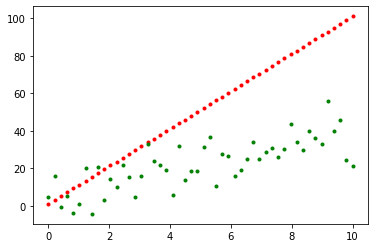

64571.62506729753 10.0 1.1111111111111107


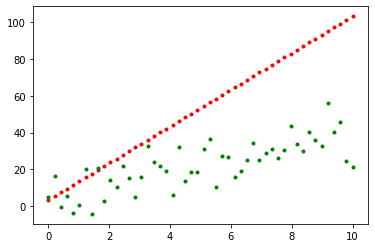

71281.88819104515 10.0 3.333333333333334


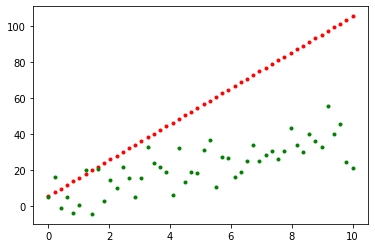

78485.9784752866 10.0 5.555555555555557


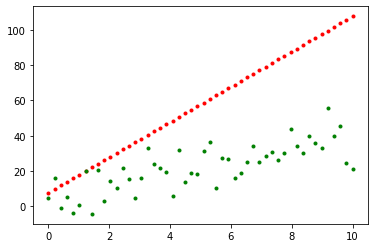

86183.89592002187 10.0 7.777777777777779


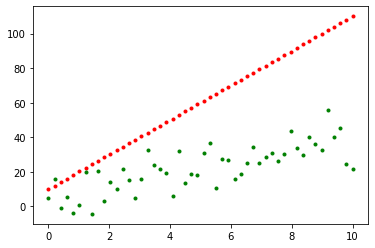

94375.64052525096 10.0 10.0


In [99]:
for m_guess in np.linspace(-10,10,10):
    for b_guess in np.linspace(-10,10,10):

        y_guess = m_guess * x + b_guess
        
        plt.plot(x,y_guess, 'r.');
        plt.plot(x,y,'g.');
        plt.show()

        loss = np.sum((y_guess - y)**2)

        print(loss,m_guess,b_guess) #tries to find the best slope intercept to best fit the data

In [100]:
best_loss = 100000 #this version will only plot it if the current loss is better than the loss before
best_m = 0 
best_b = 0
for m_guess in np.linspace(-10,1000,20):
    for b_guess in np.linspace(-10,1000,20):

      y_guess = m_guess * x + b_guess

      loss = np.sum((y_guess - y)**2)

      if loss < best_loss:

          best_loss = loss
          best_m = m
          best_b = b_guess

          plt.plot(x,y_guess, 'r.');
          plt.plot(x,y,'g.');
          plt.show()

          print(loss,m_guess, b_guess)

#In Class Linear Plot Example 10/17/22

In [101]:
import numpy as np
import matplotlib.pyplot as plt #the blueprint

In [102]:
x = np.linspace(-10,10,20) #20 steps from -10 to 10

In [103]:
x #list 20 different numbers that range from -10 to 10

array([-10.        ,  -8.94736842,  -7.89473684,  -6.84210526,
        -5.78947368,  -4.73684211,  -3.68421053,  -2.63157895,
        -1.57894737,  -0.52631579,   0.52631579,   1.57894737,
         2.63157895,   3.68421053,   4.73684211,   5.78947368,
         6.84210526,   7.89473684,   8.94736842,  10.        ])

In [104]:
m = 5 #slope of 5
b = 0 #y intercept of 0

In [105]:
y = m*x+b #linear equation

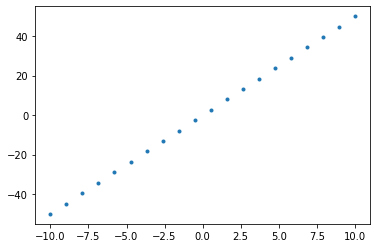

In [106]:
plt.plot(x,y,'.') #plots data as dotted graph using'.'

In [107]:
r = 10*np.random.randn(20,) #makes up random noise

In [108]:
r #tells us what the random noise is using the variable r

array([ -6.17993229,   8.56844681,  11.23221949, -17.11427267,
         0.89235719,   7.51066682,   7.1239415 ,  26.5379097 ,
        14.24072637,   1.69897162, -12.25728071,   4.10916239,
        12.04988464,  14.28522431,   0.55785991,   4.9536673 ,
        17.1088828 ,   4.67324167, -10.1336995 ,   9.90879913])

In [109]:
y2 = m * x + b + r #y=mx+b is slope intercept form

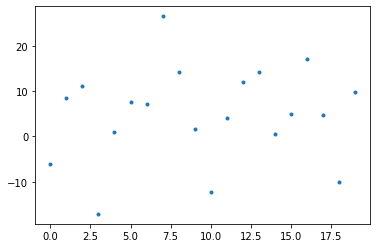

In [110]:
plt.plot(r,'.') #plots data above using the equation as a dotted graph